In [2]:
# Attempt to predict the price of Apple stocks in the next 25 days using linear regression and decision tree.
# The point is not to actually predict the price of the stocks but to devise a strategy on how to use the models

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [59]:
# Preview of data 

data = pd.read_csv (r'C:\Users\oskar\OneDrive\DESKTOP\DEJTA SETOVI\AAPL.csv')

data

,Open,High,Low,Close,Adj Close,Volume
0,27.227501,27.442499,27.042500,27.165001,25.266407,94326800
1,27.242500,27.652500,27.207500,27.254999,25.350115,117630000
2,27.334999,27.625000,27.165001,27.610001,25.680305,108929200
3,27.700001,28.084999,27.700001,28.010000,26.052345,133029200
4,27.905001,28.097500,27.832500,28.025000,26.066298,101895600
...,...,...,...,...,...,...
1253,121.650002,123.519997,121.150002,122.150002,122.150002,118323800
1254,123.660004,124.180000,122.489998,123.000000,123.000000,74957400
1255,123.870003,126.160004,123.070000,125.900002,125.900002,88651200
1256,126.500000,127.129997,125.650002,126.209999,126.209999,80171300


In [60]:
# Another preview of data

data.head(20)

,Open,High,Low,Close,Adj Close,Volume
0,27.227501,27.442499,27.042500,27.165001,25.266407,94326800
1,27.242500,27.652500,27.207500,27.254999,25.350115,117630000
2,27.334999,27.625000,27.165001,27.610001,25.680305,108929200
3,27.700001,28.084999,27.700001,28.010000,26.052345,133029200
4,27.905001,28.097500,27.832500,28.025000,26.066298,101895600
5,28.027500,28.075001,27.432501,27.462500,25.543112,187756000
6,27.222500,27.237499,26.735001,26.870001,24.992023,243286000
7,26.969999,27.000000,26.557501,26.727501,24.859484,129539600
8,26.660000,27.022499,26.514999,26.782499,24.910643,122444000
9,26.732500,26.732500,26.379999,26.492500,24.640911,126210000


In [61]:
# here im interested in how many days are in the dataset

data.shape

(1258, 6)

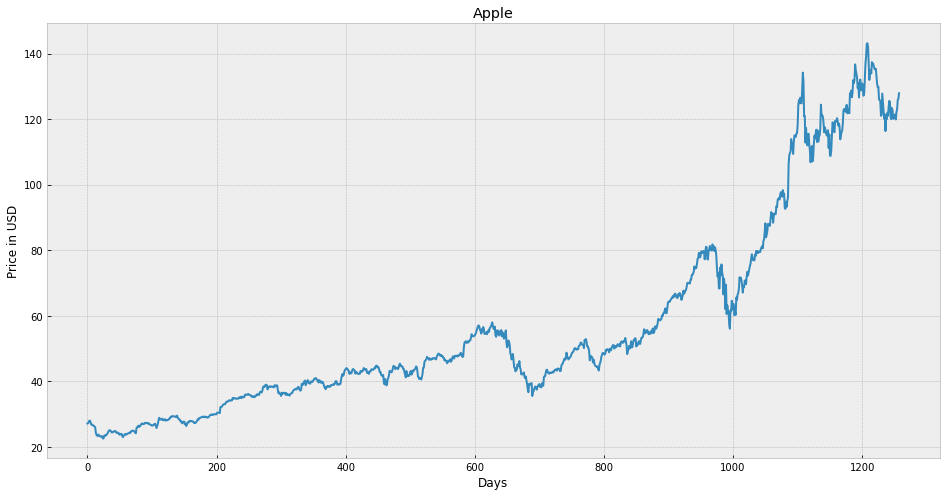

In [62]:
# visualizing data with a simple plot

plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Price in USD')
plt.plot(data['Close'])
plt.show()

In [63]:
# Number of empty values in the data set

data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [64]:
# correlations of the columns

data.iloc[:,0:8].corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999754,0.999647,0.999408,0.999360,0.021591
High,0.999754,1.000000,0.999571,0.999687,0.999659,0.029409
Low,0.999647,0.999571,1.000000,0.999692,0.999640,0.011694
Close,0.999408,0.999687,0.999692,1.000000,0.999955,0.019764
Adj Close,0.999360,0.999659,0.999640,0.999955,1.000000,0.020904
Volume,0.021591,0.029409,0.011694,0.019764,0.020904,1.000000


<AxesSubplot:>

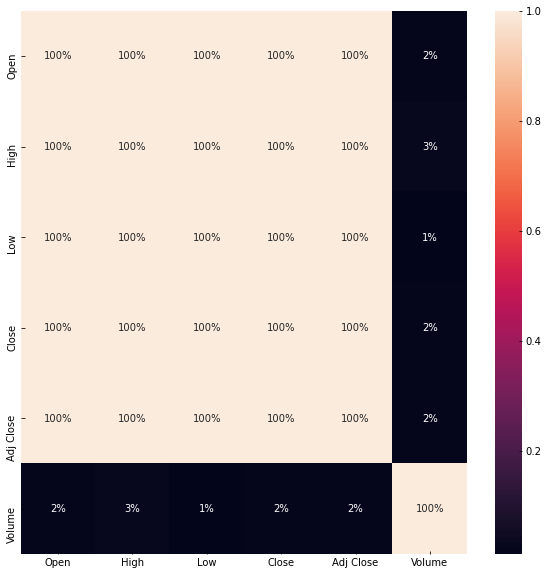

In [65]:
# visualization of correlation

plt.figure(figsize=(10,10))
sns.heatmap(data.iloc[:,0:8].corr(), annot = True, fmt='.0%')

In [66]:
# Variable for predicting n days into the future

future_days = 25

# and a new column to predict the price in the future called Prediction

data['Prediction'] = data[['Close']].shift(-future_days)

data.head()

,Open,High,Low,Close,Adj Close,Volume,Prediction
0,27.227501,27.442499,27.042500,27.165001,25.266407,94326800,22.629999
1,27.242500,27.652500,27.207500,27.254999,25.350115,117630000,23.469999
2,27.334999,27.625000,27.165001,27.610001,25.680305,108929200,23.372499
3,27.700001,28.084999,27.700001,28.010000,26.052345,133029200,23.639999
4,27.905001,28.097500,27.832500,28.025000,26.066298,101895600,23.549999


In [67]:
# So the 25 days have no value which is expected

data.tail(26)

,Open,High,Low,Close,Adj Close,Volume,Prediction
1232,128.410004,128.720001,125.010002,125.120003,125.120003,102015300,127.900002
1233,124.809998,125.709999,121.839996,122.059998,122.059998,112430400,NaN
1234,121.750000,123.599998,118.620003,120.129997,120.129997,177275300,NaN
1235,120.980003,121.940002,117.570000,121.419998,121.419998,153590400,NaN
1236,120.930000,121.000000,116.209999,116.360001,116.360001,153918600,NaN
1237,119.029999,122.059998,118.790001,121.089996,121.089996,129159600,NaN
1238,121.690002,122.169998,119.449997,119.980003,119.980003,111760400,NaN
1239,122.540001,123.209999,121.260002,121.959999,121.959999,102753600,NaN
1240,120.400002,121.169998,119.160004,121.029999,121.029999,87963400,NaN
1241,121.410004,124.000000,120.419998,123.989998,123.989998,92403800,NaN


In [69]:
# New data set as np array and without last 25 values

x = np.array(data.drop(['Prediction'], 1))[:-future_days]

print(x)

[[2.72275010e+01 2.74424990e+01 2.70425000e+01 2.71650010e+01
  2.52664070e+01 9.43268000e+07]
 [2.72425000e+01 2.76525000e+01 2.72075000e+01 2.72549990e+01
  2.53501150e+01 1.17630000e+08]
 [2.73349990e+01 2.76250000e+01 2.71650010e+01 2.76100010e+01
  2.56803050e+01 1.08929200e+08]
 ...
 [1.22589996e+02 1.24849998e+02 1.21199997e+02 1.21260002e+02
  1.21260002e+02 1.64320000e+08]
 [1.23750000e+02 1.27930000e+02 1.22790001e+02 1.27790001e+02
  1.27790001e+02 1.15998300e+08]
 [1.28410004e+02 1.28720001e+02 1.25010002e+02 1.25120003e+02
  1.25120003e+02 1.02015300e+08]]


In [70]:
# the target data set without last 25 days

y = np.array(data['Prediction'])[:-future_days]

print(y)

[ 22.629999  23.469999  23.372499 ... 125.900002 126.209999 127.900002]


In [71]:
# splitting the data into train and test datasets with train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [73]:
# creating decision tree and linear regression models

tree = DecisionTreeRegressor().fit(x_train, y_train)

lin = LinearRegression().fit(x_train, y_train)

In [75]:
# using the last n rows in the dataset 

x_future = data.drop(['Prediction'], 1)[:-future_days]

x_future = x_future.tail(future_days)

x_future = np.array(x_future)

x_future

array([[1.43600006e+02, 1.44300003e+02, 1.41369995e+02, 1.43160004e+02,
        1.42946396e+02, 9.83906000e+07],
       [1.43429993e+02, 1.44300003e+02, 1.40410004e+02, 1.42059998e+02,
        1.41848038e+02, 1.40843800e+08],
       [1.39520004e+02, 1.41990005e+02, 1.36699997e+02, 1.37089996e+02,
        1.36885452e+02, 1.42621100e+08],
       [1.35830002e+02, 1.36740005e+02, 1.30210007e+02, 1.31960007e+02,
        1.31763107e+02, 1.77180600e+08],
       [1.33750000e+02, 1.35380005e+02, 1.30929993e+02, 1.34139999e+02,
        1.33939850e+02, 1.06239800e+08],
       [1.35729996e+02, 1.36309998e+02, 1.34610001e+02, 1.34990005e+02,
        1.34788589e+02, 8.33054000e+07],
       [1.35759995e+02, 1.35770004e+02, 1.33610001e+02, 1.33940002e+02,
        1.33740158e+02, 8.98809000e+07],
       [1.36300003e+02, 1.37399994e+02, 1.34589996e+02, 1.37389999e+02,
        1.37184998e+02, 8.41831000e+07],
       [1.37350006e+02, 1.37419998e+02, 1.35860001e+02, 1.36759995e+02,
        1.36759995e+02, 

In [76]:
# data from the decision tree 

tree_predict = tree.predict(x_future)

print(tree_predict)

[122.059998 120.129997 121.419998 116.360001 115.080002 119.980003
 115.080002 121.029999 123.989998 125.57     124.760002 120.529999
 119.980003 123.389999 122.540001 120.089996 120.589996 121.209999
 127.900002 113.019997 122.150002 123.       125.900002 135.130005
 127.900002]


In [77]:
# data from linear regression

lin_predict = lin.predict(x_future)

print(lin_predict)

[141.91343666 140.81057054 139.02699131 131.56392021 133.4155729
 136.1462677  134.7174662  136.40161093 138.456273   138.34700272
 139.51016498 137.56523883 137.05648679 137.60355508 136.10835088
 133.32499617 131.30769318 132.4161362  130.53689354 124.2729893
 126.37355681 125.67355032 126.53128506 129.79665523 128.83677403]


<ipython-input-89-c8e06056558d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Pred'] = pred


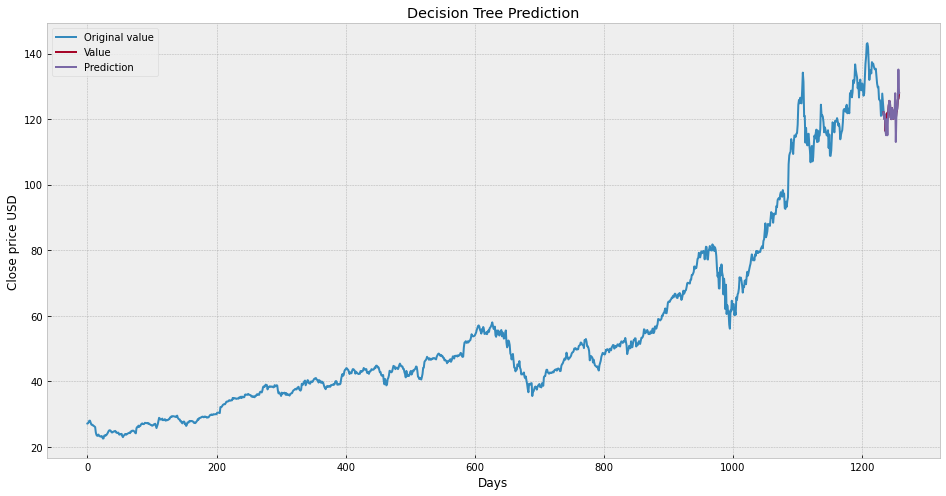

In [89]:
# plotting the predicted data vs the actual data for the decision tree

pred = tree_predict

valid = data[x.shape[0]:]

valid['Pred'] = pred

plt.figure(figsize=(16,8))

plt.title('Decision Tree Prediction')

plt.xlabel('Days')

plt.ylabel('Close price USD')

plt.plot(data['Close'])

plt.plot(valid[['Close', 'Prediction']])

plt.legend(['Original value', 'Value', 'Prediction'])

plt.show()

<ipython-input-95-eb1c3b4e10ab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Pred'] = pred


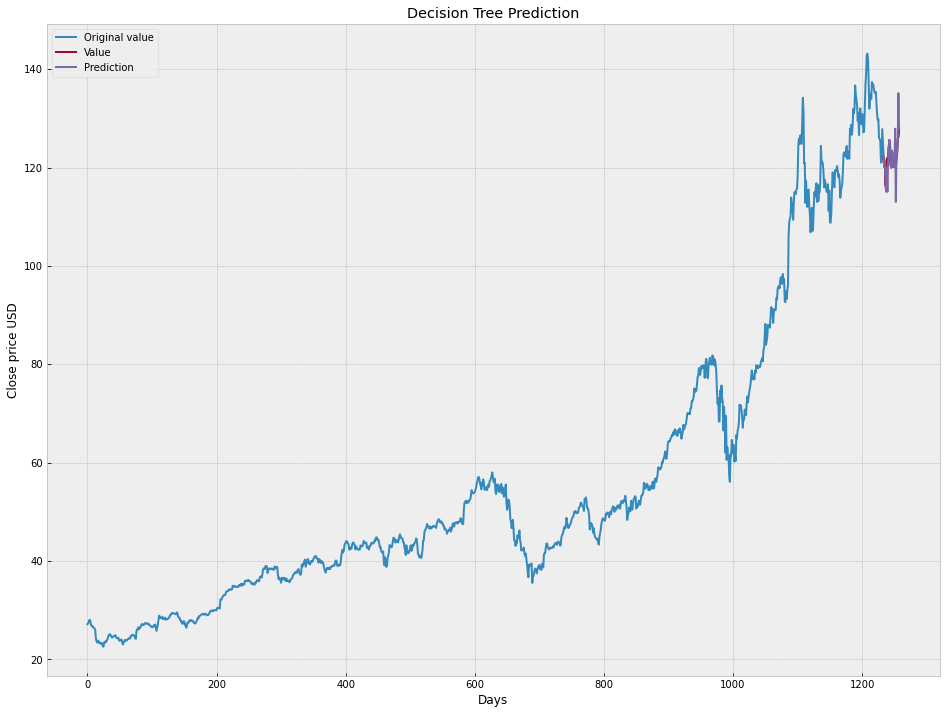

In [95]:
# plotting the predicted data vs the actual data for the linear regression

pred = lin_predict

valid = data[x.shape[0]:]

valid['Pred'] = pred

plt.figure(figsize=(16, 12))

plt.title('Decision Tree Prediction')

plt.xlabel('Days')

plt.ylabel('Close price USD')

plt.plot(data['Close'])

plt.plot(valid[['Close', 'Prediction']])

plt.legend(['Original value', 'Value', 'Prediction'])

plt.show()

In [ ]:
# by comparing the graphs it can be seen that linear regression and decision tree are not adequate models for predicting
# stock price but never the less it was a good exercise